In [1]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import shap
import sklearn
import numpy as np
import sys
import os

In [2]:
Tree = DecisionTreeRegressor()

In [3]:
target = [-10] * 10 + [10] * 5 + [5] * 20 + [14] * 5
cat_1 = [1] * 10 + [0] * 30
x = [60] * 5 + [45] * 30 +  [50] * 5
cat_2 = [1] * 15 + [0] * 25
data = pd.DataFrame({"cat_1": cat_1,
                     "cat_2": cat_2,
                     "x": x,
                     "target": target})

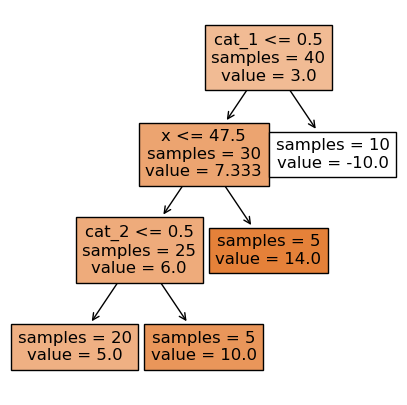

In [4]:
Tree.fit(data.values[:,:-1], data.values[:,-1])
fig, ax = plt.subplots(figsize = (5,5))
plot_tree(Tree, ax = ax, filled=True, feature_names = ["cat_1", "cat_2", "x"], impurity = False)
plt.show()

In [5]:
explainer_tree = shap.TreeExplainer(Tree)
input_shap = np.array([0,1,60])
print(f"Shap values from the fitted explainer: {explainer_tree.shap_values(input_shap)}")
print(f"Theoretical Shap values: {np.array([191/36, 25/18, 155/36])}")

Shap values from the fitted explainer: [5.30555556 1.38888889 4.30555556]
Theoretical Shap values: [5.30555556 1.38888889 4.30555556]


In [6]:
Tree.tree_.value

array([[[  3.        ]],

       [[  7.33333333]],

       [[  6.        ]],

       [[  5.        ]],

       [[ 10.        ]],

       [[ 14.        ]],

       [[-10.        ]]])

In [7]:
Tree.criterion

'squared_error'

In [8]:
tree = Tree.tree_

In [9]:
isinstance(tree, sklearn.tree._tree.Tree)

True

In [10]:
tree.children_left

array([ 1,  2,  3, -1, -1, -1, -1], dtype=int64)

In [11]:
tree.children_right

array([ 6,  5,  4, -1, -1, -1, -1], dtype=int64)

In [12]:
tree.feature

array([ 0,  2,  1, -2, -2, -2, -2], dtype=int64)

In [13]:
tree.threshold

array([ 0.5, 47.5,  0.5, -2. , -2. , -2. , -2. ])

In [14]:
target2 = [-10] * 6 + [10] * 8 + [6] * 4 + [5] * 14 + [4] * 2 + [3] * 3 + [-5] * 3
cat_12 = [1] * 10 + [0] * 30
x2 = [60] * 5 + [45] * 30 +  [50] * 5
cat_22 = [1] * 15 + [0] * 25
data2 = pd.DataFrame({"cat_1": cat_12,
                     "cat_2": cat_22,
                     "x": x2,
                     "target": target2})

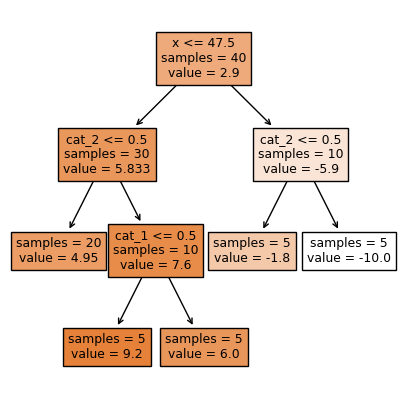

In [15]:
Tree2 = DecisionTreeRegressor()
Tree2.fit(data2.values[:,:-1], data2.values[:,-1])
fig, ax = plt.subplots(figsize = (5,5))
plot_tree(Tree2, ax = ax, filled=True, feature_names = ["cat_1", "cat_2", "x"], impurity = False)
plt.show()
tree2 = Tree2.tree_

In [16]:
sys.path.append(os.path.abspath("../src/helper-functions"))
import tree_shap


In [17]:
nu = tree.value.flatten()
a = tree.children_left
b = tree.children_right
t = tree.threshold
r = tree.weighted_n_node_samples
d = tree.feature
shap_local = tree_shap.cat_tree_shap(input_shap, nu, a, b, t, r, d)


{'feature': [], 'z': [], 'o': [], 'weight': []}
{'feature': [], 'z': [], 'o': [], 'weight': []}
{'feature': [0], 'z': [0.75], 'o': [1], 'weight': [1]}
{'feature': [0], 'z': [0.75], 'o': [1], 'weight': [1]}
{'feature': [0, 2], 'z': [0.75, 0.8333333333333334], 'o': [1, 0], 'weight': [1, 0]}
{'feature': [0, 2], 'z': [0.75, 0.8333333333333334], 'o': [1, 0], 'weight': [1, 0]}
{'feature': [0, 2], 'z': [0.75, 0.8333333333333334], 'o': [1, 0], 'weight': [1, 0]}
{'feature': [0, 2], 'z': [0.75, 0.8333333333333334], 'o': [1, 0], 'weight': [1, 0]}
{'feature': [], 'z': [], 'o': [], 'weight': []}


In [18]:
shap_local

array([  0. ,   9. , -19.5])

In [31]:
input_shap[d[0]] <= t[0]

True

In [19]:
m = {"weight":[4,5,4]}

In [20]:
weight = m["weight"].copy()
t = m["weight"][0]
t = 345
print(m)

{'weight': [4, 5, 4]}


In [26]:
weight[1] = 123
print(m)

{'weight': [4, 5, 4]}


In [26]:
explainer_tree2 = shap.TreeExplainer(Tree2)
input_shap = np.array([0,1,60])
print(f"Shap values from the fitted explainer: {explainer_tree2.shap_values(input_shap)}")

Shap values from the fitted explainer: [  0.33333333  -1.76666667 -11.46666667]


In [27]:
nu = tree2.value.flatten()
a = tree2.children_left
b = tree2.children_right
t = tree2.threshold
r = tree2.weighted_n_node_samples
d = tree2.feature
shap_local = tree_shap.cat_tree_shap(input_shap, nu, a, b, t, r, d)

{'feature': [0], 'z': [1], 'o': [1], 'weight': [1]}
{'feature': [0, 2], 'z': [1, 0.25], 'o': [1, 1], 'weight': [1, 0]}
{'feature': [0, 2, 1], 'z': [1, 0.25, 0.5], 'o': [1, 1, 1], 'weight': [0.25, 0.5, 0]}
1.5
1.5
{'feature': [0, 2, 1, 1], 'z': [1, 0.25, 0.5, 0.5], 'o': [1, 1, 1, 0], 'weight': [0.08333333333333333, 0.08333333333333333, 0.0, 0]}
0.3333333333333333
0.3333333333333333
0.5555555555555556
{'feature': [0, 2, 1, 1, 2], 'z': [1, 0.25, 0.5, 0.5, 0.75], 'o': [1, 1, 1, 0, 0], 'weight': [0.046875, 0.03125, 0.0, 0.0, 0]}
{'feature': [0, 2, 1, 2, 1], 'z': [1, 0.25, 0.5, 0.75, 0.16666666666666666], 'o': [1, 1, 0, 0, 1], 'weight': [0.01953125, 0.0390625, 0.0, 0.0, 0]}
{'feature': [2, 1, 2, 1, 0], 'z': [0.25, 0.5, 0.75, 0.16666666666666666, 0.5], 'o': [1, 0, 0, 1, 1], 'weight': [0.0732421875, 0.048828125, 0.0, 0.0, 0]}
0.34586588541666663
0.23057725694444445
0.244140625
0.244140625
{'feature': [2, 1, 2, 1, 0, 0], 'z': [0.25, 0.5, 0.75, 0.16666666666666666, 0.5, 0.5], 'o': [1, 0, 0, 1, 1

In [28]:
shap_local

array([  1.04394531,  -6.90708984, -13.54867839])